# Task
Develop neural network-based time series forecasting model for the given dataset using python code

Here is all the data you need:
"NFLX (1).csv"

## Data loading

### Subtask:
Load the "NFLX (1).csv" dataset.


**Reasoning**:
Load the dataset "NFLX (1).csv" into a pandas DataFrame, parsing the 'Date' column as datetime objects and setting it as the index. Display the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('NFLX (1).csv', parse_dates=['Date'], index_col='Date')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'NFLX (1).csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


(5044, 6)


## Data exploration

### Subtask:
Explore the loaded NFLX dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, visualize the distribution of the 'Close' price, check for missing values, investigate the correlation between features, and identify potential outliers.



Shape of the DataFrame: (5044, 6)

Data types of each column:
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Descriptive statistics:
               Open         High          Low        Close    Adj Close  \
count  5044.000000  5044.000000  5044.000000  5044.000000  5044.000000   
mean    116.467981   118.237392   114.578719   116.456338   116.456338   
std     168.740876   171.140864   166.119837   168.668232   168.668232   
min       0.377857     0.410714     0.346429     0.372857     0.372857   
25%       3.955357     4.031072     3.885357     3.958571     3.958571   
50%      25.819285    26.342143    25.455000    25.802856    25.802856   
75%     155.762497   157.654998   153.944996   155.869999   155.869999   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  5.044000e+03  
mean   1.653068e+07  
std    1.924487e+07  
min    2.856000e

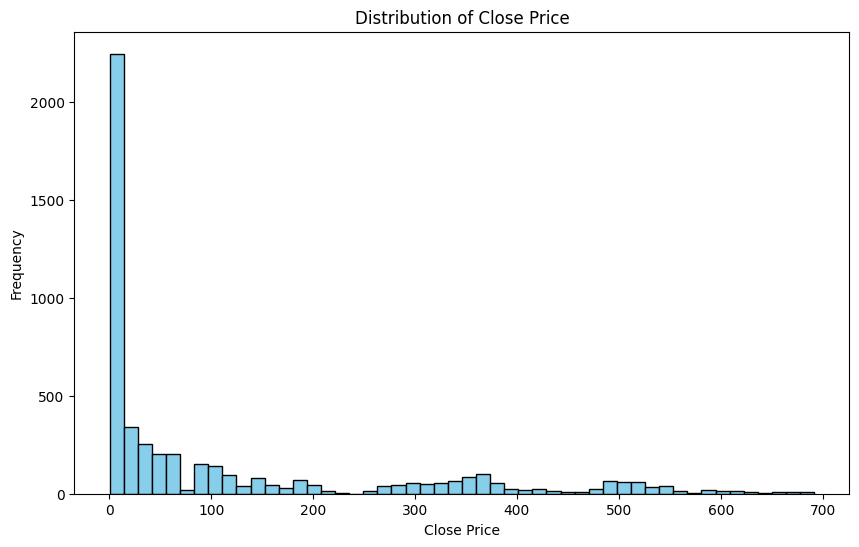


Missing values per column:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Correlation Matrix:
                Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999863  0.999853  0.999695   0.999695 -0.262560
High       0.999863  1.000000  0.999815  0.999861   0.999861 -0.261281
Low        0.999853  0.999815  1.000000  0.999856   0.999856 -0.264033
Close      0.999695  0.999861  0.999856  1.000000   1.000000 -0.262548
Adj Close  0.999695  0.999861  0.999856  1.000000   1.000000 -0.262548
Volume    -0.262560 -0.261281 -0.264033 -0.262548  -0.262548  1.000000


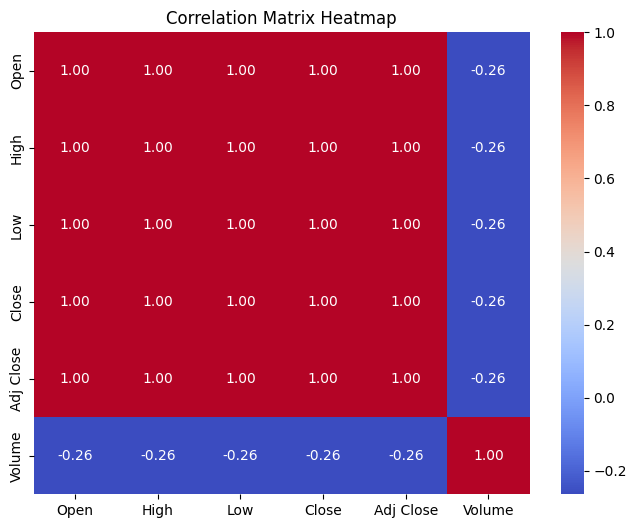

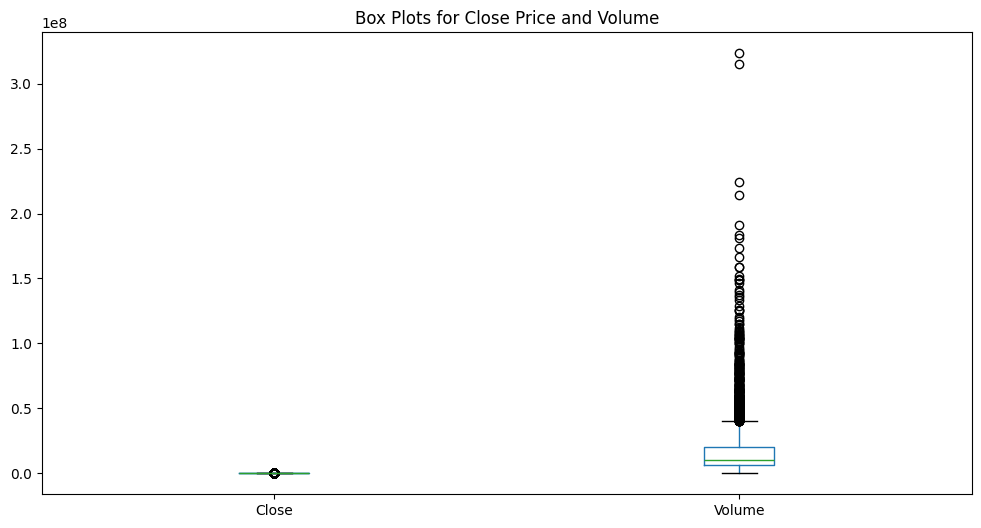

In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData types of each column:\n", df.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())

# Visualize the distribution of 'Close' price
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Investigate the correlation between features
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Identify potential outliers using box plots
plt.figure(figsize=(12, 6))
df[['Close', 'Volume']].boxplot(column=['Close', 'Volume'], grid=False)
plt.title('Box Plots for Close Price and Volume')
plt.show()

## Data preparation

### Subtask:
Prepare the data for time series forecasting by handling outliers, creating lagged features, and potentially normalizing the data.


**Reasoning**:
Handle outliers in 'Close' and 'Volume' columns using IQR method, create lagged features for 'Close' price, and then normalize the data using MinMaxScaler.



In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Calculate IQR for 'Close' and 'Volume'
Q1_close = df['Close'].quantile(0.25)
Q3_close = df['Close'].quantile(0.75)
IQR_close = Q3_close - Q1_close
lower_bound_close = Q1_close - 1.5 * IQR_close
upper_bound_close = Q3_close + 1.5 * IQR_close

Q1_volume = df['Volume'].quantile(0.25)
Q3_volume = df['Volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

# Create a copy of the DataFrame to avoid modifying the original
df_no_outliers = df.copy()

# Winsorize the 'Close' and 'Volume' columns
df_no_outliers['Close'] = np.clip(df_no_outliers['Close'], lower_bound_close, upper_bound_close)
df_no_outliers['Volume'] = np.clip(df_no_outliers['Volume'], lower_bound_volume, upper_bound_volume)

# Create lagged features for 'Close' price
for i in range(1, 4):
    df_no_outliers[f'Close_lag{i}'] = df_no_outliers['Close'].shift(i)

# Drop rows with NaN values created by lagging
df_no_outliers.dropna(inplace=True)

# Normalize the 'Close' price and lagged features using MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Close'] + [f'Close_lag{i}' for i in range(1, 4)]
df_no_outliers[columns_to_scale] = scaler.fit_transform(df_no_outliers[columns_to_scale])
df_normalized = df_no_outliers.copy()

display(df_normalized.head())

,Open,High,Low,Close,Adj Close,Volume,Close_lag1,Close_lag2,Close_lag3
Date,,,,,,,,,
2002-05-29,1.164286,1.164286,1.085714,0.001906,1.103571,6757800,0.002046,0.002184,0.002148
2002-05-30,1.107857,1.107857,1.071429,0.001822,1.071429,10154200,0.001906,0.002046,0.002184
2002-05-31,1.078571,1.078571,1.071429,0.001835,1.076429,8464400,0.001822,0.001906,0.002046
2002-06-03,1.080000,1.149286,1.076429,0.001971,1.128571,3151400,0.001835,0.001822,0.001906
2002-06-04,1.135714,1.140000,1.110714,0.001943,1.117857,3105200,0.001971,0.001835,0.001822


## Data splitting

### Subtask:
Split the preprocessed data into training, validation, and test sets.


**Reasoning**:
Split the preprocessed data (df_normalized) into training, validation, and test sets based on the specified ratios, preserving chronological order. Create separate variables for features (lagged 'Close' prices) and the target variable ('Close' price).



In [4]:
# Define the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calculate the split points
data_length = len(df_normalized)
train_split = int(train_ratio * data_length)
val_split = int((train_ratio + val_ratio) * data_length)

# Split the data into training, validation, and test sets
X = df_normalized[['Close_lag1', 'Close_lag2', 'Close_lag3']]
y = df_normalized['Close']

X_train = X.iloc[:train_split]
y_train = y.iloc[:train_split]
X_val = X.iloc[train_split:val_split]
y_val = y.iloc[train_split:val_split]
X_test = X.iloc[val_split:]
y_test = y.iloc[val_split:]

print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

3528 3528
756 756
757 757


## Feature engineering

### Subtask:
Further refine features for improved model performance.


**Reasoning**:
Add more lagged features, rolling statistics, and percentage change features to the datasets. Then, drop rows with NaN values and check the shapes of the datasets.



In [5]:
# Add more lagged features
for i in range(4, 7):  # Lags 4, 5, and 6
    df_normalized[f'Close_lag{i}'] = df_normalized['Close'].shift(i)

# Calculate rolling statistics
for window in [7, 14, 30]:
    df_normalized[f'Close_rolling_mean_{window}'] = df_normalized['Close'].rolling(window=window).mean()
    df_normalized[f'Close_rolling_std_{window}'] = df_normalized['Close'].rolling(window=window).std()

# Calculate percentage change
df_normalized['Close_pct_change'] = df_normalized['Close'].pct_change()

# Drop rows with NaN values
df_normalized.dropna(inplace=True)

# Split the data again after adding new features
X = df_normalized[['Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6',
                  'Close_rolling_mean_7', 'Close_rolling_std_7', 'Close_rolling_mean_14',
                  'Close_rolling_std_14', 'Close_rolling_mean_30', 'Close_rolling_std_30',
                  'Close_pct_change']]
y = df_normalized['Close']

data_length = len(df_normalized)
train_split = int(train_ratio * data_length)
val_split = int((train_ratio + val_ratio) * data_length)

X_train = X.iloc[:train_split]
y_train = y.iloc[:train_split]
X_val = X.iloc[train_split:val_split]
y_val = y.iloc[train_split:val_split]
X_test = X.iloc[val_split:]
y_test = y.iloc[val_split:]

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3508, 13)
y_train shape: (3508,)
X_val shape: (752, 13)
y_val shape: (752,)
X_test shape: (752, 13)
y_test shape: (752,)


## Model training

### Subtask:
Train a Long Short-Term Memory (LSTM) network for time series forecasting.


**Reasoning**:
Train the LSTM model using the prepared data.



In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Reshape the input features for LSTM
timesteps = 1
X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, X_train.shape[1]))
X_val = np.array(X_val).reshape((X_val.shape[0], timesteps, X_val.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define a ModelCheckpoint callback to save the best model
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback], verbose=1)

print("Model training finished.")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo